# Object Detection Model

***
### Install and Import libraries

In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install matplotlib

In [ ]:
import tensorflow as tf
import numpy as np
import json
from matplotlib import pyplot as plt
import os
import cv2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

***
### Load Images and Labels Dataset

In [ ]:
# helper function to load images 
def load_JPG(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [ ]:
# helper function to load labels without scene category 
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return label['class'], label['bbox']

In [ ]:
class_labels = [ 'football_beach', 'football_street', 'umbrella_beach', 'umbrella_street', 'sand_castle', 'car', 'aeroplane', 'bird_sky', 'bird_forest', 'moon', 'apple']

In [ ]:
# transformation function to appy augmentations 
augmentor = A.Compose([A.Flip(p=0.5), 
                       A.Rotate(p=0.2),
                       A.Blur(p=0.1),
                       A.GaussNoise(p=0.5),
                       A.HueSaturationValue(p=0.5),
                       A.RandomBrightnessContrast(p=0.3),
                       A.RandomRotate90(p=0.2), 
                       A.RGBShift(p=0.5)], 
                       bbox_params=A.BboxParams(format='albumentations', label_fields=['class_labels']))

In [ ]:
# creating augmented images
for folder in ['train','test','val']: 
    for image in os.listdir(os.path.join(r"C:\Users\hudna\Downloads\OD\data", folder, 'images')):
        img = cv2.imread(os.path.join(r"C:\Users\hudna\Downloads\OD\data", folder, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join(r"C:\Users\hudna\Downloads\OD\data", folder, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            # get annotated bbox coordinates and normalize
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [150,150,150,150]))

        try: 
            for x in range(16):
                with open(label_path, 'r') as f:
                    label = json.load(f)
                
                if label['shapes'][0]['label'] == 'football_beach':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['football_beach'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                    
                    # create new annotations
                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [1, 0, 0, 0, 0, 0, 0, 0]
                    annotation['scene'] = [1, 0, 0, 0]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)
                        
                elif label['shapes'][0]['label'] == 'football_street':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['football_street'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [1, 0, 0, 0, 0, 0, 0, 0]
                    annotation['scene'] = [0, 0, 0, 1]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)
                        
                elif label['shapes'][0]['label'] == 'umbrella_beach':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['umbrella_beach'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [0, 1, 0, 0, 0, 0, 0, 0]
                    annotation['scene'] = [1, 0, 0, 0]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)
                        
                elif label['shapes'][0]['label'] == 'umbrella_street':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['umbrella_street'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [0, 1, 0, 0, 0, 0, 0, 0]
                    annotation['scene'] = [0, 0, 0, 1]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)
                        
                elif label['shapes'][0]['label'] == 'sand_castle':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['sand_castle'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [0, 0, 1, 0, 0, 0, 0, 0]
                    annotation['scene'] = [1, 0, 0, 0]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)
                
                elif label['shapes'][0]['label'] == 'car':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['car'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [0, 0, 0, 1, 0, 0, 0, 0]
                    annotation['scene'] = [0, 0, 0, 1]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)
                        
                elif label['shapes'][0]['label'] == 'aeroplane':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['aeroplane'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [0, 0, 0, 0, 1, 0, 0, 0]
                    annotation['scene'] = [0, 0, 1, 0]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)
                        
                        
                elif label['shapes'][0]['label'] == 'bird_sky':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['bird_sky'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [0, 0, 0, 0, 0, 1, 0, 0]
                    annotation['scene'] = [0, 0, 1, 0]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)   
                        
                elif label['shapes'][0]['label'] == 'bird_forest':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['bird_forest'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [0, 0, 0, 0, 0, 1, 0, 0]
                    annotation['scene'] = [0, 1, 0, 0]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)    
                        
                        
                elif label['shapes'][0]['label'] == 'moon':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['moon'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [0, 0, 0, 0, 0, 0, 1, 0]
                    annotation['scene'] = [0, 0, 1, 0]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)    
                        
                        
                elif label['shapes'][0]['label'] == 'apple':
                    augmented = augmentor(image=img, bboxes=[coords], class_labels=['apple'])
                    cv2.imwrite(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                    annotation = {}
                    annotation['image'] = image
                    annotation['bbox'] = augmented['bboxes'][0]
                    annotation['class'] = [0, 0, 0, 0, 0, 0, 0, 1]
                    annotation['scene'] = [0, 1, 0, 0]

                    with open(os.path.join(r"C:\Users\hudna\Downloads\OD\augdata", folder, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                        json.dump(annotation, f)    
                        
        except Exception as e:
            print(e)

In [ ]:
# function to calculate the class distribution
class_counts = [0] * 8
def count_classes_in_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            with open(os.path.join(folder_path, filename)) as f:
                data = json.load(f)
                class_label = np.argmax(data['class'])
                class_counts[class_label] += 1
    return class_counts

In [ ]:
# load images and labels from local machine 
train_images = tf.data.Dataset.list_files("/content/augdata/train/images/*.jpg", shuffle=False)
val_images = tf.data.Dataset.list_files("/content/augdata/val/images/*.jpg", shuffle=False)
test_images = tf.data.Dataset.list_files("/content/augdata/test/images/*.jpg", shuffle=False)

train_labels = tf.data.Dataset.list_files("/content/augdata/train/labels/*.json", shuffle=False)
test_labels = tf.data.Dataset.list_files("/content/augdata/test/labels/*.json", shuffle=False)
val_labels = tf.data.Dataset.list_files("/content/augdata/val/labels/*.json", shuffle=False)

# preprocess images and labels without scene labels category
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (150,150)))
train_images = train_images.map(lambda x: x/255)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint64, tf.float16]))

test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (150,150)))
test_images = test_images.map(lambda x: x/255)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint64, tf.float16]))

val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (150,150)))
val_images = val_images.map(lambda x: x/255)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint64, tf.float16]))

In [ ]:
# combine images and lables into one Dataset object
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(2000)
train = train.batch(32)

test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1000)
test = test.batch(704) # test batch uses one batch to prevent using batch averages for testing results

val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(32)

In [ ]:
# to view 'train' Dataset object
train.as_numpy_iterator().next()

(array([[[[0.7882353 , 0.84705883, 0.73333335],
          [0.78039217, 0.8352941 , 0.73333335],
          [0.78039217, 0.827451  , 0.73333335],
          ...,
          [0.7294118 , 0.78039217, 0.7019608 ],
          [0.74509805, 0.7921569 , 0.7137255 ],
          [0.75686276, 0.8039216 , 0.7254902 ]],
 
         [[0.79607844, 0.8509804 , 0.7490196 ],
          [0.75686276, 0.8117647 , 0.70980394],
          [0.77254903, 0.81960785, 0.7254902 ],
          ...,
          [0.7411765 , 0.7921569 , 0.7137255 ],
          [0.78039217, 0.8235294 , 0.75686276],
          [0.7764706 , 0.8235294 , 0.74509805]],
 
         [[0.7921569 , 0.84705883, 0.7490196 ],
          [0.78039217, 0.8352941 , 0.7372549 ],
          [0.78431374, 0.8392157 , 0.7490196 ],
          ...,
          [0.7176471 , 0.7607843 , 0.69411767],
          [0.7607843 , 0.8117647 , 0.74509805],
          [0.7490196 , 0.8       , 0.7294118 ]],
 
         ...,
 
         [[0.4117647 , 0.4745098 , 0.36862746],
          [0.40784

***
### Build and Train the model

In [ ]:
# build model architecture using Functional API
def build_model(): 
    input_layer = Input(shape=(150,150,3))
    vgg = VGG16(include_top=False)(input_layer)

    # Classification branch  
    b1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(b1)
    class2 = Dense(8, activation='softmax')(class1)
    
    # Bounding box branch
    b2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(b2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    objectdetection = Model(inputs=input_layer, outputs=[class2, regress2])
    return objectdetection

In [ ]:
objectdetection = build_model()

In [ ]:
# learning rate decays by 75% of prev rate per epoch to prevent overfitting
lr_decay = (1./0.75 -1)/len(train)

In [ ]:
# low learning rate since transfer learning is used
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [ ]:
# custom function to calculate bounding box IoU metric
def iou(y_true, y_pred):
    AoG = tf.abs(tf.transpose(y_true)[2] - tf.transpose(y_true)[0] + 1) * tf.abs(tf.transpose(y_true)[3] - tf.transpose(y_true)[1] + 1)
    AoP = tf.abs(tf.transpose(y_pred)[2] - tf.transpose(y_pred)[0] + 1) * tf.abs(tf.transpose(y_pred)[3] - tf.transpose(y_pred)[1] + 1)

    overlap_0 = tf.maximum(tf.transpose(y_true)[0], tf.transpose(y_pred)[0])
    overlap_1 = tf.maximum(tf.transpose(y_true)[1], tf.transpose(y_pred)[1])
    overlap_2 = tf.minimum(tf.transpose(y_true)[2], tf.transpose(y_pred)[2])
    overlap_3 = tf.minimum(tf.transpose(y_true)[3], tf.transpose(y_pred)[3])

    intersection = (overlap_2 - overlap_0 + 1) * (overlap_3 - overlap_1 + 1)
    union = AoG + AoP - intersection
    iou = intersection / union
    iou = tf.clip_by_value(iou, 0.0 + tf.keras.backend.epsilon(), 1.0 - tf.keras.backend.epsilon())

    return iou 

In [ ]:
# helper function to calculate the running mean IoU of each training batch
def mean():
    count = 0
    mean = 0
    
    def inner(value):
        nonlocal count, mean
        count += 1
        mean += (value - mean) / count
        return mean
    
    return inner

In [ ]:
# subclassing the Keras Model() class
class OD(Model): 
    # to initialize with custom metrics
    def __init__(self, odmodel,  **kwargs): 
        super().__init__(**kwargs)
        self.model = odmodel
        self.acc_metric = tf.keras.metrics.Accuracy(name="acc")
        self.iou = iou
        
    # to compile with customized loss functions    
    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.opt = opt
        self.closs = classloss
        self.lloss = localizationloss
        
    # to train model
    def train_step(self, batch, **kwargs): 
        # take one batch
        X, y = batch
        iou_result = 0.0
        
        with tf.GradientTape() as tape: 
            # make predictions
            classes, bbox = self.model(X, training=True)

            # calculate losses
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), bbox)
            total_loss = batch_localizationloss+0.5*batch_classloss
            grad = tape.gradient(total_loss, self.model.trainable_variables)
            
        # apply gradients
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        # calculate metrics
        self.acc_metric.update_state(tf.argmax(y[0], 1), tf.argmax(classes, 1))
        iou_result = iou(tf.cast(y[1], tf.float32), bbox)
        mean_iou = mean()
        
        # show loss and metrics while training to monitor progress
        return {"total loss":total_loss, "accuracy":self.acc_metric.result(), "mean iou":mean_iou(iou_result)}
    
    # to test model and for use with validation sets
    def test_step(self, batch, **kwargs): 
        # take one batch
        X, y = batch
        iou_result=0.0
        
        # make predictions
        classes, bbox = self.model(X, training=False)

        # calculate losses
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), bbox)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        # calculate metrics
        self.acc_metric.update_state(tf.argmax(y[0], 1), tf.argmax(classes, 1))
        iou_result = iou(tf.cast(y[1], tf.float32), bbox)
        mean_iou = mean()
        
        # show results
        return {"total loss":total_loss, "accuracy":self.acc_metric.result(), "mean iou":mean_iou(iou_result)}
    
    # to reinitialize metrics after each epoch
    @property
    def metrics(self):
        return [self.acc_metric] 
        
    # to make predictions with trained model
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [ ]:
model = OD(objectdetection)

In [ ]:
# compile model
model.compile(opt, 
              tf.keras.losses.CategoricalCrossentropy(), 
              tf.keras.losses.Huber())

In [ ]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=4)

In [ ]:
# train model
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[early_stop])

In [ ]:
# helper method to plot graph for mean IoU
histmeannparray = np.array(hist.history['mean iou'])
histvalmeannparray = np.array(hist.history['val_mean iou'])
meanlist = []
valmeanlist = []

for x in range(0,24):
    arr1 = histmeannparray[x]
    arr2 = histvalmeannparray[x]
    means = np.mean(arr1)
    valmeans = np.mean(arr2)
    meanlist.append(means)
    valmeanlist.append(valmeans)

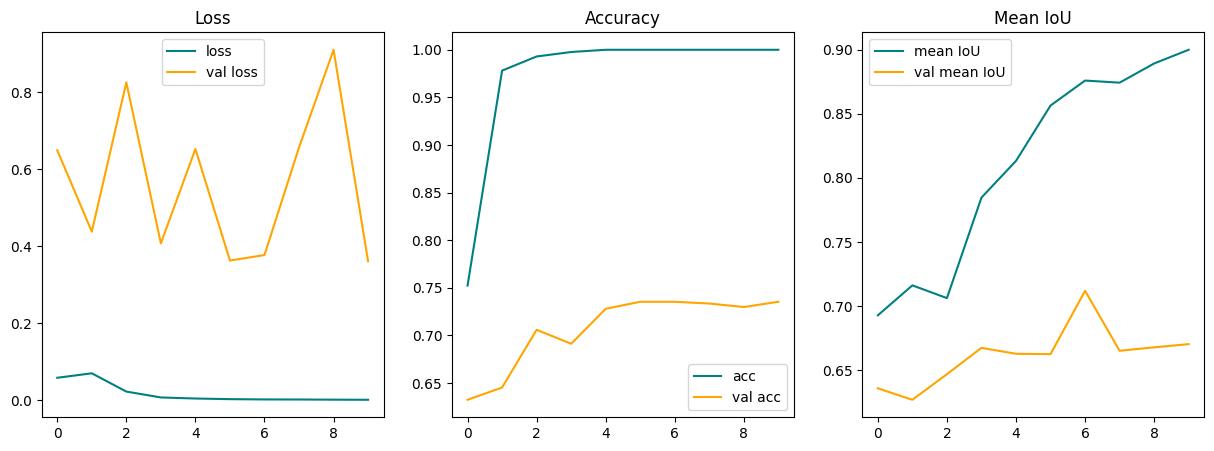

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].plot(hist.history['total loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['accuracy'], color='teal', label='acc')
ax[1].plot(hist.history['val_accuracy'], color='orange', label='val acc')
ax[1].title.set_text('Accuracy')
ax[1].legend()

ax[2].plot(meanlist, color='teal', label='mean IoU')
ax[2].plot(valmeanlist, color='orange', label='val mean IoU')
ax[2].title.set_text('Mean IoU')
ax[2].legend()

plt.show()

***
### Evaluate model

In [ ]:
from sklearn import metrics
import seaborn as sns

In [ ]:
results = model.evaluate(test)

1/1 [==============================] - 35s 35s/step - total loss: 0.5169 - accuracy: 0.7344 - mean iou: 0.6662


In [ ]:
print("test accuracy:", results[0])
print("test mean IoU:", results[1].mean())

test accuracy: 0.734375
test mean IoU: 0.6661994


In [ ]:
testimages, testtruelabels = test.as_numpy_iterator().next()

In [ ]:
pred=model.predict(testimages)

In [ ]:
cm = metrics.confusion_matrix(np.argmax(testtruelabels[0], axis=1), np.argmax(pred[0], axis=1))

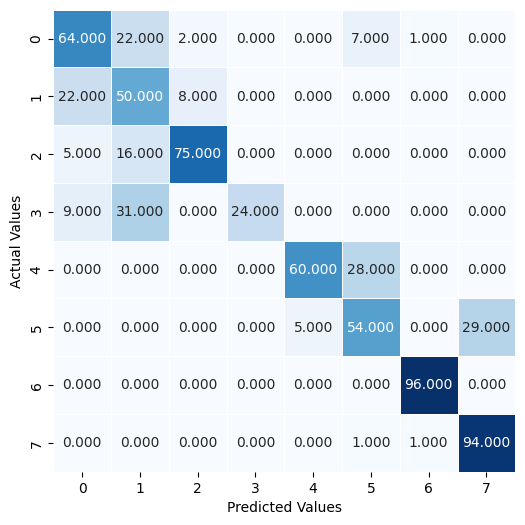

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False, cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(metrics.classification_report(np.argmax(testtruelabels[0], axis=1), np.argmax(pred[0], axis=1)))